In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso, LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Set interactive backend
%matplotlib inline

In [ ]:
#Importing diabetes DataFrame

diabetes = load_diabetes()

diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
#Dividing data into training and testing sets
X = diabetes_df.drop(columns=['target'])
y = diabetes_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078
66,-0.009147,0.050680,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633
137,0.005383,-0.044642,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504
245,-0.027310,-0.044642,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483
31,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499


In [ ]:
#Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train[:5]

array([[ 1.49836523,  1.06136988,  0.21990201,  1.13887373,  0.72847289,
         1.05589332, -0.82445065,  0.71103773,  0.54748197, -0.06144896],
       [-0.22885822,  1.06136988, -0.41936607, -0.71059105, -0.4249289 ,
         0.27242452, -1.52979055,  1.4842858 , -0.01975653,  0.36723647],
       [ 0.08518241, -0.94217861,  1.01898711,  1.99247286, -0.30958872,
        -0.32669867, -0.11911075, -0.06221033,  0.3312366 , -0.31866022],
       [-0.621409  , -0.94217861, -0.78466212, -0.63945779, -1.17464007,
        -1.21550781,  0.66460025, -0.83545839, -1.06968217, -2.71929861],
       [-0.54289885, -0.94217861, -1.4239302 , -1.7064567 , -0.79978448,
        -1.11016747,  1.29156905, -1.60870645, -0.80285867, -0.91881982]])

In [ ]:
#Training regression model
ridge_reg=Ridge()
ridge_reg.fit(X_train,y_train)
regressor = ridge_reg
print ('Ridge')
print ('R² train score =', regressor.score(X_train, y_train))
print ('R² test score =', regressor.score(X_test, y_test))
print ('b: {}, \nw= {}'.format(regressor.intercept_, regressor.coef_)) 

Ridge
R² train score = 0.5276319768458045
R² test score = 0.45414652070698225
b: 153.73654390934846, 
w= [  1.80734179 -11.44818951  25.73269892  16.73429974 -34.67195409
  17.05307485   3.36991411  11.76426044  31.3783838    2.45813922]


In [ ]:
#training lasso model
lasso_reg=Lasso()
lasso_reg.fit(X_train,y_train)
regressor = lasso_reg
print ('R² train score =', regressor.score(X_train, y_train))
print ('R² test score =', regressor.score(X_test, y_test))
print ('b: {}, \nw= {}'.format(regressor.intercept_, regressor.coef_)) 

R² train score = 0.5225434389503393
R² test score = 0.46687670944102466
b: 153.73654390934846, 
w= [ 0.68703212 -9.29751904 26.21922482 15.65731357 -8.2281718  -0.
 -9.02408714  3.42086059 22.63646533  2.09864712]


In [ ]:
#Training polynomial regression model
poly_degree = 2
poly_model = make_pipeline(PolynomialFeatures(degree=poly_degree), StandardScaler(), LinearRegression())
poly_model.fit(X_train, y_train)

regressor = poly_model.named_steps['linearregression']
print('R² train score =', poly_model.score(X_train, y_train))
print('R² test score =', poly_model.score(X_test, y_test))
print('b: {}, \nw= {}'.format(regressor.intercept_, regressor.coef_))

R² train score = 0.6061583502354674
R² test score = 0.4156399336407952
b: 153.7365439093484, 
w= [ 1.62514134e-11  5.63831686e+00 -7.26340921e+00  2.02382357e+01
  1.88886391e+01 -8.11137706e+02  7.04291129e+02  2.85543872e+02
  3.20644419e+00  3.02036267e+02  6.95143359e-01  6.00348022e+00
  3.30547935e+00 -2.92654559e+00  1.36134193e+00 -2.20974172e+00
 -1.66217551e+01  1.17481993e+01  2.07722621e+01  2.68265168e+00
  1.80298403e+00 -7.26340921e+00  7.74191106e-01  2.81946876e+00
  3.66828379e+00  3.74139441e+00 -7.31407239e+00 -1.65100979e+01
  4.83821947e+00  1.56013843e+00  2.50953734e+00  8.29615114e+00
 -1.37337432e+01  1.58715223e+01 -4.48354701e-01 -7.75468084e+00
  7.83771739e+00  1.10003411e+00 -7.29644721e-01  4.47904408e+01
 -3.21941784e+01 -1.93225220e+01 -3.03542506e+00 -1.71077358e+01
 -7.85797830e+00  3.18470256e+02 -4.48498631e+02 -1.32443758e+02
 -7.28639846e+01 -9.28570160e+01 -1.72150630e+01  1.72646317e+02
  7.21780363e+01  2.05922079e+01  5.20581016e+01  9.444084

In [ ]:
#Count accuracy of model using r2_score
y_pred_poly = poly_model.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)

r2_poly = r2_score(y_test, y_pred_poly)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'R² Score (Polynomial): ', r2_poly)
print(f'R² Score (Ridge): ', r2_ridge)
print(f'R² Score (Lasso): ', r2_lasso)

R² Score (Polynomial):  0.4156399336407952
R² Score (Ridge):  0.45414652070698225
R² Score (Lasso):  0.46687670944102466


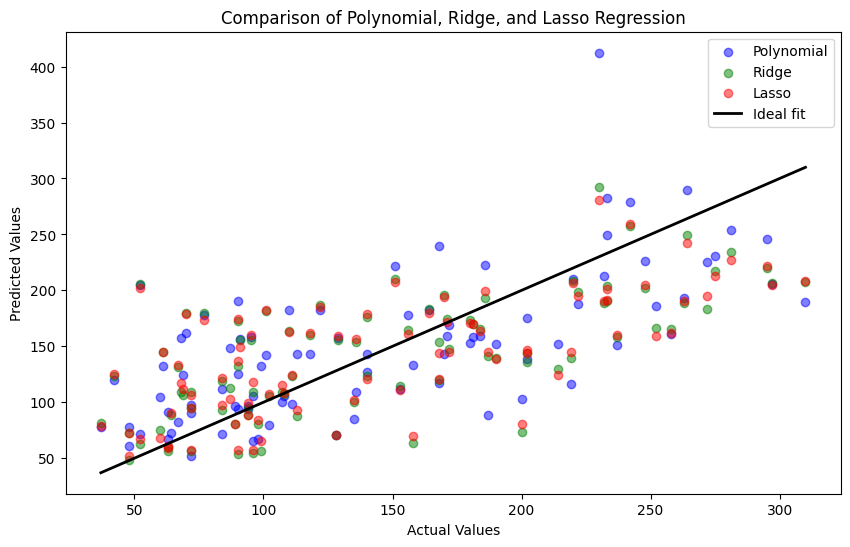

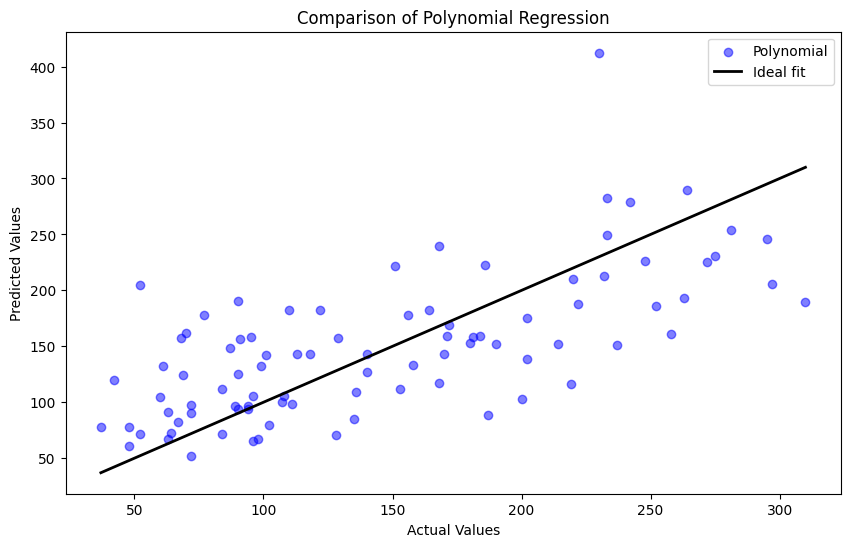

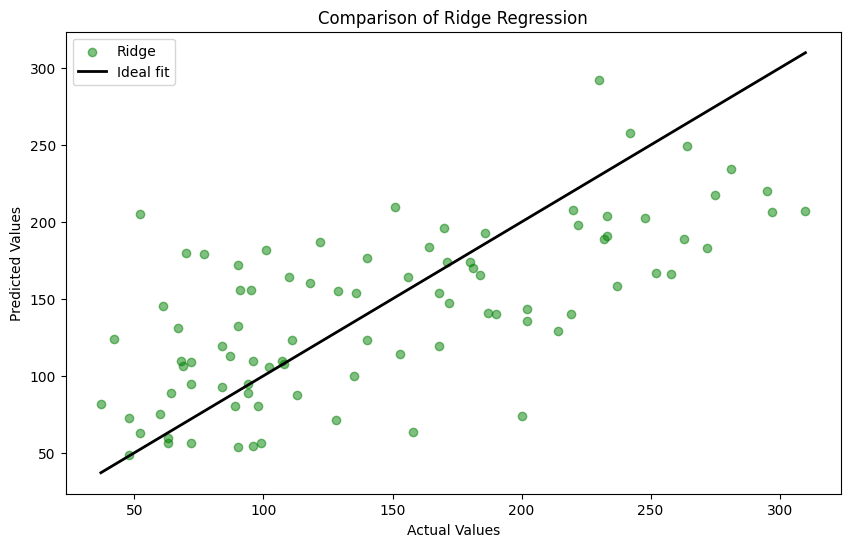

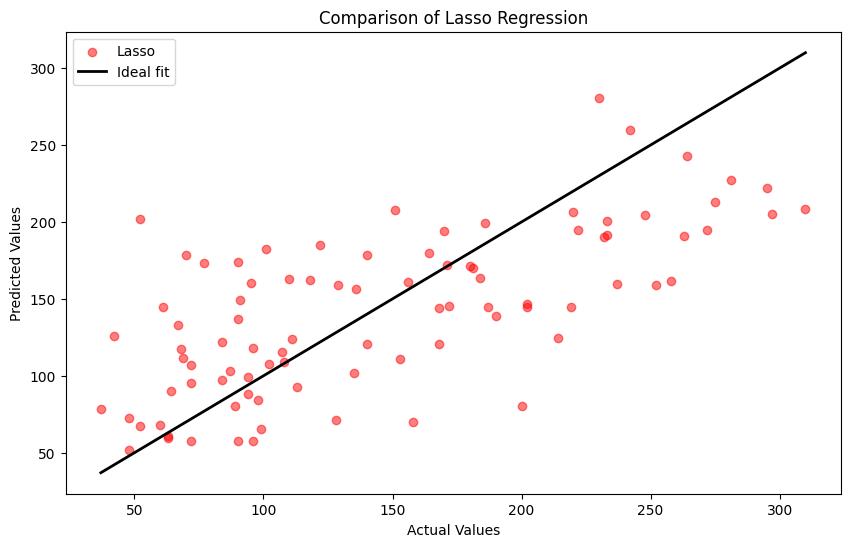

In [ ]:
#Comparing all models
plt.figure(figsize=(10,6))

plt.scatter(y_test, y_pred_poly, color='blue', label='Polynomial', alpha=0.5)
plt.scatter(y_test, y_pred_ridge, color='green', label='Ridge', alpha=0.5)
plt.scatter(y_test, y_pred_lasso, color='red', label='Lasso', alpha=0.5)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', lw=2, label='Ideal fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Polynomial, Ridge, and Lasso Regression')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_poly, color='blue', label='Polynomial', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', lw=2, label='Ideal fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Polynomial Regression')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_ridge, color='green', label='Ridge', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', lw=2, label='Ideal fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Ridge Regression')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_lasso, color='red', label='Lasso', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', lw=2, label='Ideal fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Lasso Regression')
plt.legend()
plt.show()